## Heatmap Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
measles_data = pd.read_csv('US.14189004.csv')
measles_data.info()

C:\Users\DearUser\AppData\Local\Temp\ipykernel_11504\842698599.py:1: DtypeWarning: Columns (9,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  measles_data = pd.read_csv('US.14189004.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436932 entries, 0 to 436931
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ConditionName                436932 non-null  object 
 1   ConditionSNOMED              436932 non-null  int64  
 2   PathogenName                 436932 non-null  object 
 3   PathogenTaxonID              436932 non-null  int64  
 4   Fatalities                   436932 non-null  int64  
 5   CountryName                  436932 non-null  object 
 6   CountryISO                   436932 non-null  object 
 7   Admin1Name                   436932 non-null  object 
 8   Admin1ISO                    436932 non-null  object 
 9   Admin2Name                   238827 non-null  object 
 10  CityName                     238827 non-null  object 
 11  PeriodStartDate              436932 non-null  object 
 12  PeriodEndDate                436932 non-null  object 
 13 

In [3]:
measles_data.head()

,ConditionName,ConditionSNOMED,PathogenName,PathogenTaxonID,Fatalities,CountryName,CountryISO,Admin1Name,Admin1ISO,Admin2Name,CityName,PeriodStartDate,PeriodEndDate,PartOfCumulativeCountSeries,AgeRange,Subpopulation,PlaceOfAcquisition,DiagnosisCertainty,SourceName,CountValue
0,Measles,14189004,Measles virus,11234,0,UNITED STATES OF AMERICA,US,WISCONSIN,US-WI,NaN,NaN,1927-11-20,1927-11-26,0,0-130,None specified,NaN,NaN,US Nationally Notifiable Disease Surveillance ...,85
1,Measles,14189004,Measles virus,11234,0,UNITED STATES OF AMERICA,US,WISCONSIN,US-WI,NaN,NaN,1927-11-27,1927-12-03,0,0-130,None specified,NaN,NaN,US Nationally Notifiable Disease Surveillance ...,120
2,Measles,14189004,Measles virus,11234,0,UNITED STATES OF AMERICA,US,WISCONSIN,US-WI,NaN,NaN,1927-12-04,1927-12-10,0,0-130,None specified,NaN,NaN,US Nationally Notifiable Disease Surveillance ...,84
3,Measles,14189004,Measles virus,11234,0,UNITED STATES OF AMERICA,US,WISCONSIN,US-WI,NaN,NaN,1927-12-18,1927-12-24,0,0-130,None specified,NaN,NaN,US Nationally Notifiable Disease Surveillance ...,106
4,Measles,14189004,Measles virus,11234,0,UNITED STATES OF AMERICA,US,WISCONSIN,US-WI,NaN,NaN,1927-12-25,1927-12-31,0,0-130,None specified,NaN,NaN,US Nationally Notifiable Disease Surveillance ...,39


In [4]:
measles = measles_data[['Admin1Name', 'PeriodStartDate', 'PeriodEndDate', 'CountValue']].copy()
measles

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue
0,WISCONSIN,1927-11-20,1927-11-26,85
1,WISCONSIN,1927-11-27,1927-12-03,120
2,WISCONSIN,1927-12-04,1927-12-10,84
3,WISCONSIN,1927-12-18,1927-12-24,106
4,WISCONSIN,1927-12-25,1927-12-31,39
...,...,...,...,...
436927,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-13,1
436928,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1
436929,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1
436930,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-27,1


In [5]:
measles['PeriodStartDate'] = pd.to_datetime(measles['PeriodStartDate'])
measles['PeriodEndDate'] = pd.to_datetime(measles['PeriodEndDate'])
measles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436932 entries, 0 to 436931
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Admin1Name       436932 non-null  object        
 1   PeriodStartDate  436932 non-null  datetime64[ns]
 2   PeriodEndDate    436932 non-null  datetime64[ns]
 3   CountValue       436932 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 13.3+ MB


In [6]:
measles['year'] = measles['PeriodEndDate'].dt.year
measles.head()

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue,year
0,WISCONSIN,1927-11-20,1927-11-26,85,1927
1,WISCONSIN,1927-11-27,1927-12-03,120,1927
2,WISCONSIN,1927-12-04,1927-12-10,84,1927
3,WISCONSIN,1927-12-18,1927-12-24,106,1927
4,WISCONSIN,1927-12-25,1927-12-31,39,1927


In [7]:
measles['interval'] = measles['PeriodEndDate'] - measles['PeriodStartDate']
measles

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue,year,interval
0,WISCONSIN,1927-11-20,1927-11-26,85,1927,6 days
1,WISCONSIN,1927-11-27,1927-12-03,120,1927,6 days
2,WISCONSIN,1927-12-04,1927-12-10,84,1927,6 days
3,WISCONSIN,1927-12-18,1927-12-24,106,1927,6 days
4,WISCONSIN,1927-12-25,1927-12-31,39,1927,6 days
...,...,...,...,...,...,...
436927,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-13,1,1997,349 days
436928,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1,1997,356 days
436929,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1,1997,356 days
436930,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-27,1,1997,363 days


In [8]:
measles.loc[measles.interval.dt.components.days > 7 ]

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue,year,interval
352519,WISCONSIN,1965-01-03,1965-01-16,382,1965,13 days
352520,WISCONSIN,1965-01-03,1965-01-23,599,1965,20 days
352521,WISCONSIN,1965-01-03,1965-01-30,886,1965,27 days
352522,WISCONSIN,1965-01-03,1965-02-06,1174,1965,34 days
352523,WISCONSIN,1965-01-03,1965-02-13,1472,1965,41 days
...,...,...,...,...,...,...
436927,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-13,1,1997,349 days
436928,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1,1997,356 days
436929,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-20,1,1997,356 days
436930,NORTHERN MARIANA ISLANDS,1996-12-29,1997-12-27,1,1997,363 days


In [9]:
fixed_int_measles = measles.loc[measles.interval.dt.components.days <= 7 ]
fixed_int_measles

,Admin1Name,PeriodStartDate,PeriodEndDate,CountValue,year,interval
0,WISCONSIN,1927-11-20,1927-11-26,85,1927,6 days
1,WISCONSIN,1927-11-27,1927-12-03,120,1927,6 days
2,WISCONSIN,1927-12-04,1927-12-10,84,1927,6 days
3,WISCONSIN,1927-12-18,1927-12-24,106,1927,6 days
4,WISCONSIN,1927-12-25,1927-12-31,39,1927,6 days
...,...,...,...,...,...,...
433459,PENNSYLVANIA,1981-01-04,1981-01-10,3,1981,6 days
434001,PENNSYLVANIA,1989-12-31,1990-01-06,11,1990,6 days
434002,PENNSYLVANIA,1989-12-31,1990-01-06,4,1990,6 days
435865,"VIRGIN ISLANDS, U.S.",1971-01-03,1971-01-09,1,1971,6 days


In [11]:
grouped_measles = fixed_int_measles.groupby(
                                 ['Admin1Name','year']
                                 ).CountValue.sum().reset_index()

grouped_measles_1927 = grouped_measles.loc[grouped_measles.year >= 1927]
grouped_measles_1927

,Admin1Name,year,CountValue
24,ALABAMA,1927,1851
25,ALABAMA,1928,10284
26,ALABAMA,1929,3117
27,ALABAMA,1930,5691
28,ALABAMA,1931,11026
...,...,...,...
4588,WYOMING,1987,2
4589,WYOMING,1990,2
4590,WYOMING,1991,3
4591,WYOMING,1992,1


In [12]:
one_state_data = grouped_measles_1927.loc[grouped_measles_1927.Admin1Name == 'CALIFORNIA']
one_state_data

,Admin1Name,year,CountValue
330,CALIFORNIA,1927,15132
331,CALIFORNIA,1928,5218
332,CALIFORNIA,1929,5983
333,CALIFORNIA,1930,56353
334,CALIFORNIA,1931,32942
...,...,...,...
400,CALIFORNIA,1997,7
401,CALIFORNIA,1998,2
402,CALIFORNIA,1999,2
403,CALIFORNIA,2000,1


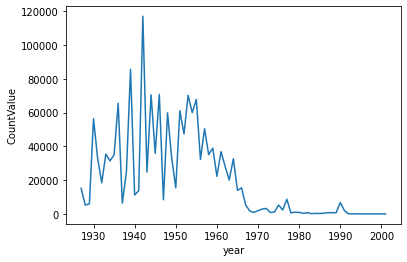

In [13]:
sns.lineplot(data = one_state_data, x = 'year', y = 'CountValue');

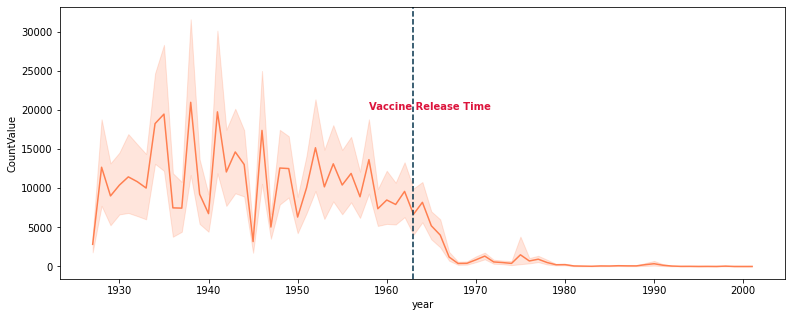

In [16]:
plt.figure(figsize=(13, 5))

graph = sns.lineplot(data=grouped_measles_1927,
                     x='year',
                     y='CountValue',
                     color='coral')

graph.axvline(1963, color='#003049',linestyle = '--')

graph.annotate("Vaccine Release Time",
               color='#DC143C',
               xy=(1958, 20000),
               weight='bold')
plt.show()

In [17]:
measles_matrix = grouped_measles_1927.pivot('Admin1Name', 'year', 'CountValue')
measles_matrix

year,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
Admin1Name,,,,,,,,,,,,,,,,,,,,,
ALABAMA,1851.0,10284.0,3117.0,5691.0,11026.0,320.0,2020.0,18316.0,8156.0,605.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,6.0,NaN,7.0,NaN,1.0,NaN
AMERICAN SAMOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARIZONA,44.0,847.0,236.0,2219.0,2241.0,91.0,1304.0,1022.0,586.0,2329.0,...,NaN,3.0,10.0,12.0,8.0,5.0,10.0,1.0,NaN,2.0
ARKANSAS,1252.0,10293.0,1314.0,1422.0,953.0,114.0,6658.0,8771.0,1999.0,112.0,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN
CALIFORNIA,15132.0,5218.0,5983.0,56353.0,32942.0,18432.0,35437.0,31370.0,34883.0,65438.0,...,48.0,46.0,45.0,7.0,36.0,7.0,2.0,2.0,1.0,10.0
COLORADO,7818.0,3553.0,973.0,18001.0,6717.0,3838.0,438.0,20457.0,20685.0,1042.0,...,23.0,NaN,15.0,8.0,6.0,NaN,NaN,NaN,2.0,NaN
CONNECTICUT,780.0,13700.0,10794.0,2268.0,18483.0,6406.0,6273.0,6012.0,31788.0,4159.0,...,6.0,1.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0
DELAWARE,30.0,994.0,937.0,308.0,3200.0,63.0,344.0,4110.0,1172.0,1606.0,...,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [18]:
measles_matrix.fillna(value=0, inplace= True)
measles_matrix

year,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
Admin1Name,,,,,,,,,,,,,,,,,,,,,
ALABAMA,1851.0,10284.0,3117.0,5691.0,11026.0,320.0,2020.0,18316.0,8156.0,605.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALASKA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,6.0,0.0,7.0,0.0,1.0,0.0
AMERICAN SAMOA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARIZONA,44.0,847.0,236.0,2219.0,2241.0,91.0,1304.0,1022.0,586.0,2329.0,...,0.0,3.0,10.0,12.0,8.0,5.0,10.0,1.0,0.0,2.0
ARKANSAS,1252.0,10293.0,1314.0,1422.0,953.0,114.0,6658.0,8771.0,1999.0,112.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
CALIFORNIA,15132.0,5218.0,5983.0,56353.0,32942.0,18432.0,35437.0,31370.0,34883.0,65438.0,...,48.0,46.0,45.0,7.0,36.0,7.0,2.0,2.0,1.0,10.0
COLORADO,7818.0,3553.0,973.0,18001.0,6717.0,3838.0,438.0,20457.0,20685.0,1042.0,...,23.0,0.0,15.0,8.0,6.0,0.0,0.0,0.0,2.0,0.0
CONNECTICUT,780.0,13700.0,10794.0,2268.0,18483.0,6406.0,6273.0,6012.0,31788.0,4159.0,...,6.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
DELAWARE,30.0,994.0,937.0,308.0,3200.0,63.0,344.0,4110.0,1172.0,1606.0,...,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


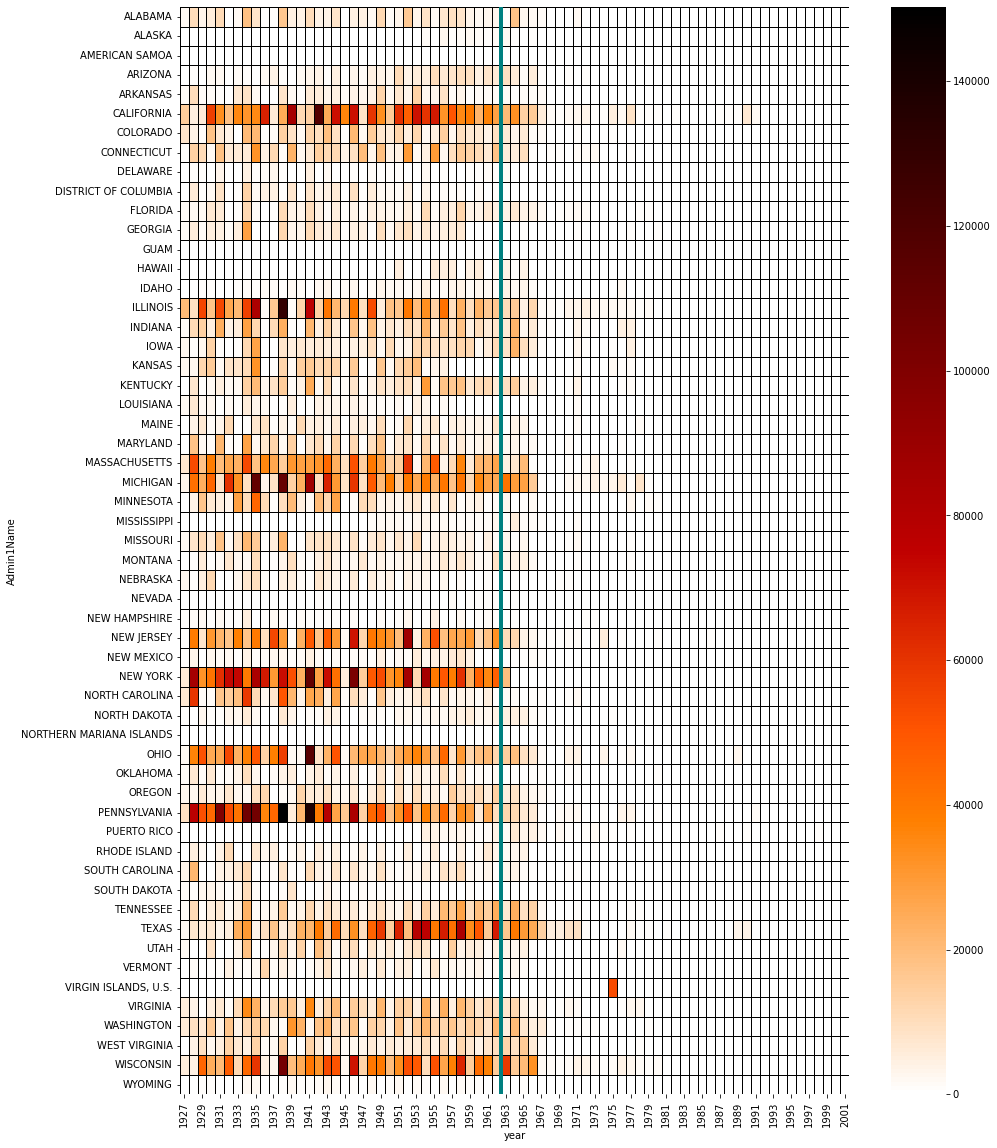

In [26]:
plt.figure(figsize=(15, 20))

graph2 = sns.heatmap(measles_matrix,
                     linewidths=1,
                     linecolor='black',
                     cmap='gist_heat_r',
                     #center=70000
                     )

graph2.axvline(x=1963-1927, linewidth=4, color="Teal")

plt.show()

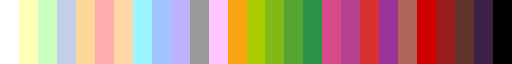

In [28]:
from matplotlib.colors import ListedColormap


newcolors = ['#FFFFFF','#FDFFB6','#CAFFBF','#C1CFEB',
             "#FED89A",'#FFADAD', '#FFD6A5', '#9BF6FF',
             '#A0C4FF','#BDB2FF','#999999','#FFC6FF',
             '#FCA311' ,'#AACC00', '#80B918','#55A630',
             '#2B9348', '#D94A8C','#B4418E','#D93030',
             '#9A329A','#B16459','#D00000','#9B1C1C',
             '#61352E','#3E1F47','#000000'
            ]

newcmp = ListedColormap(newcolors)
newcmp


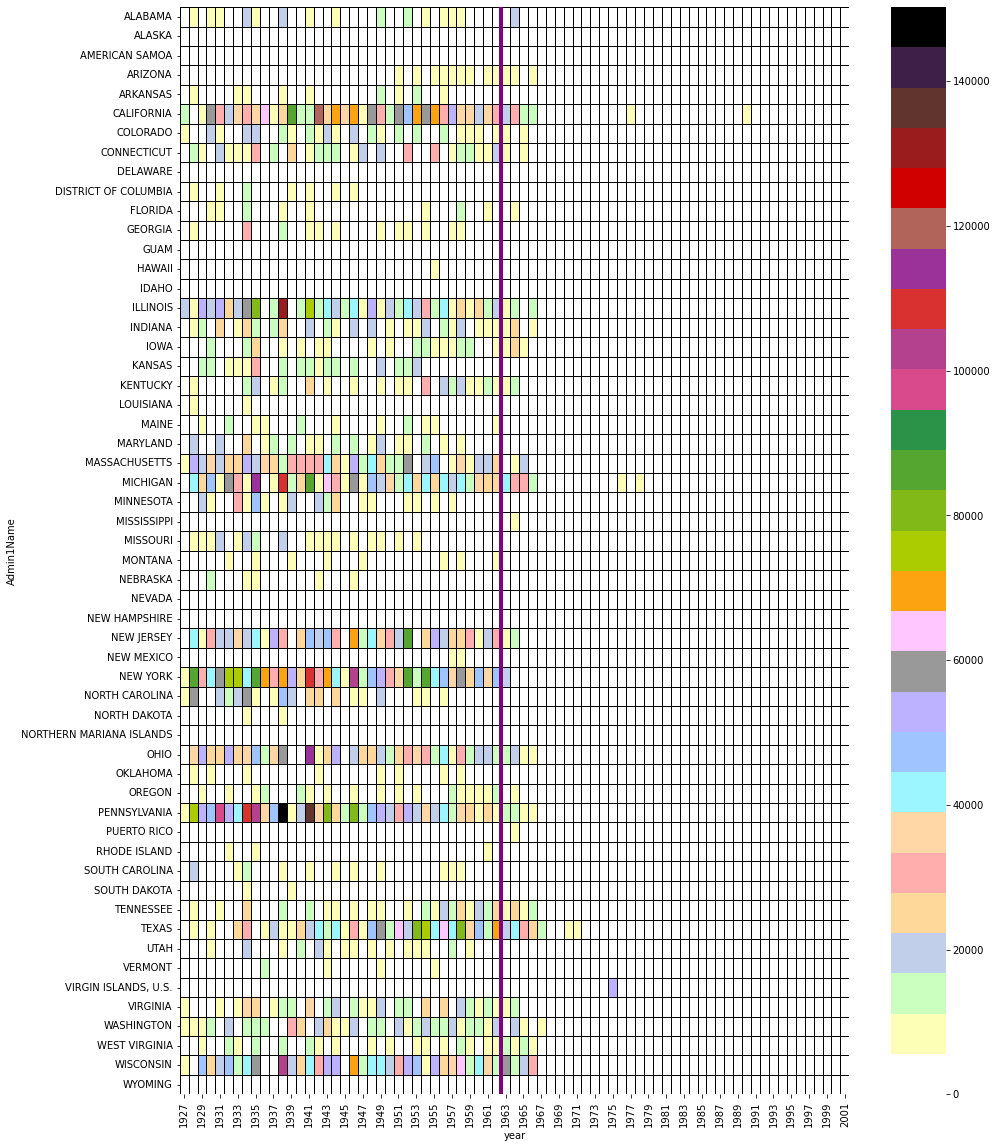

In [29]:
plt.figure(figsize=(15, 20))

graph2 = sns.heatmap(measles_matrix,
                     linecolor='black',
                     linewidths=1,
                     cmap=newcmp)
graph2.axvline(x=1963-1927, linewidth=4, color="purple")

plt.show()

## Pie Chart

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
retail = pd.read_csv('retailsmall_Nomissing.csv')
retail.head()

,Invoice,Stock_Code,Description,Quantity,Invoice_Date,Price,Customer_ID,Country
0,489434,85048,15Cm Christmas Glass Ball 20 Lights,31.037827,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,Pink Cherry Lights,12.000000,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,White Cherry Lights,31.037827,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"Record Frame 7"" Single Size",48.000000,12/1/2009 7:45,1.69,13085.0,United Kingdom
4,489434,21232,Strawberry Ceramic Trinket Box,24.000000,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [32]:
retail['Sales'] = retail.Quantity * retail.Price
retail.head()

,Invoice,Stock_Code,Description,Quantity,Invoice_Date,Price,Customer_ID,Country,Sales
0,489434,85048,15Cm Christmas Glass Ball 20 Lights,31.037827,12/1/2009 7:45,6.95,13085.0,United Kingdom,215.712900
1,489434,79323P,Pink Cherry Lights,12.000000,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.000000
2,489434,79323W,White Cherry Lights,31.037827,12/1/2009 7:45,6.75,13085.0,United Kingdom,209.505335
3,489434,22041,"Record Frame 7"" Single Size",48.000000,12/1/2009 7:45,1.69,13085.0,United Kingdom,81.120000
4,489434,21232,Strawberry Ceramic Trinket Box,24.000000,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.000000


In [33]:
sales_country = retail.groupby('Country').Sales.sum().reset_index()
sales_country

,Country,Sales
0,Australia,59255.803113
1,France,1892.801290
2,Germany,8659.151620
3,Netherlands,14039.220000
4,USA,1526.710000
5,United Kingdom,20686.151125


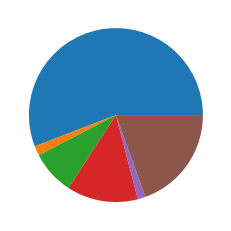

In [34]:
plt.pie(data = sales_country , x = 'Sales');

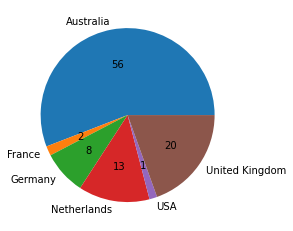

In [35]:
plt.pie(data = sales_country , 
        x = 'Sales' , 
        labels='Country', 
        autopct= '%.0f');

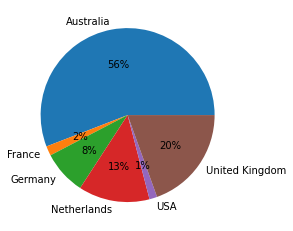

In [36]:
plt.pie(data = sales_country , 
        x = 'Sales' , 
        labels='Country', 
        autopct= '%.0f%%');

# https://mkaz.blog/code/python-string-format-cookbook/

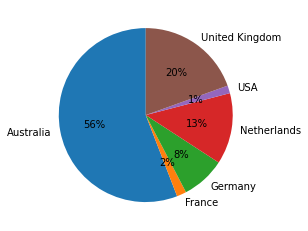

In [39]:
plt.pie(data=sales_country, 
        x='Sales', 
        labels='Country', 
        autopct='%.0f%%',
        startangle = 90
       );

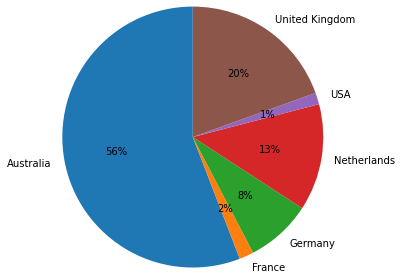

In [40]:
plt.pie(data=sales_country, 
        x='Sales', 
        labels='Country', 
        autopct='%.0f%%',
        startangle = 90,
        radius=1.5
       );

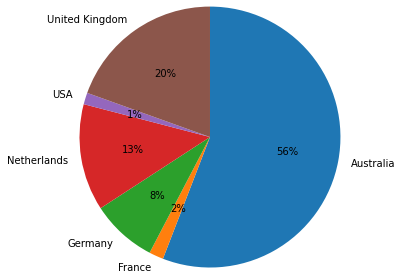

In [41]:
plt.pie(data=sales_country, 
        x='Sales', 
        labels='Country', 
        autopct='%.0f%%',
        startangle = 90,
        radius=1.5,
        counterclock=False
       );

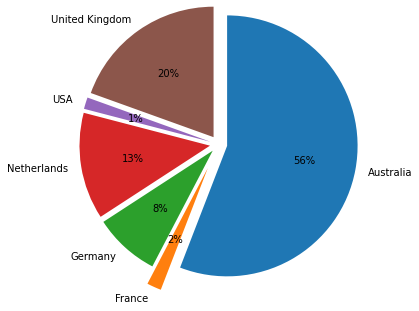

In [44]:
plt.pie(data=sales_country, 
        x='Sales', 
        labels='Country', 
        autopct='%.0f%%',
        startangle = 90,
        radius=1.5,
        counterclock=False,
        explode = (0.1 , 0.3 ,0.1 , 0.1 , 0.1 , 0.1)
       );

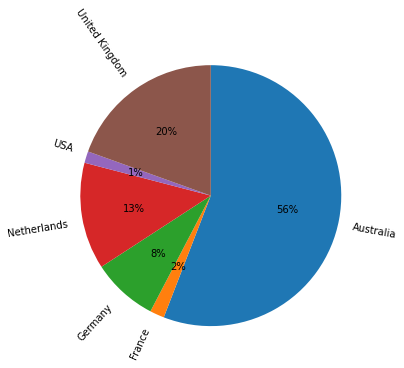

In [45]:
plt.pie(data=sales_country, 
        x='Sales', 
        labels='Country', 
        autopct='%.0f%%',
        startangle = 90,
        radius=1.5,
        counterclock=False,
        rotatelabels = True   
       );

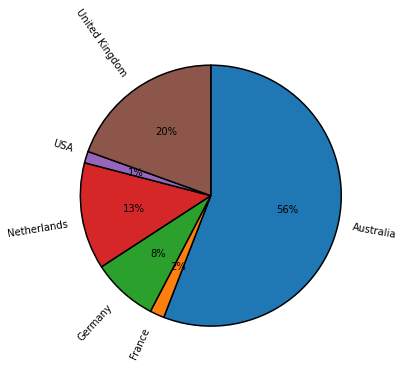

In [46]:
plt.pie(data=sales_country,
        x='Sales',
        labels='Country',
        autopct='%.0f%%',
        startangle=90,
        radius=1.5,
        counterclock=False,
        rotatelabels=True,
        
        wedgeprops={"edgecolor": "black",
                    'linewidth': 1.5}
        );

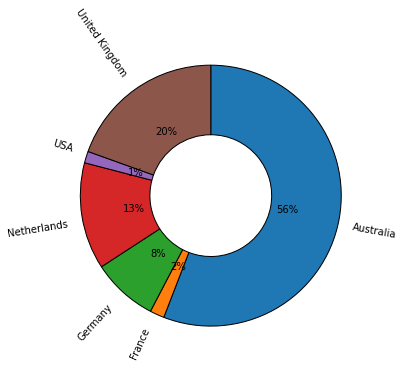

In [49]:
plt.pie(data=sales_country,
        x='Sales',
        labels='Country',
        autopct='%.0f%%',
        startangle=90,
        radius=1.5,
        counterclock=False,
        rotatelabels=True,
        
        wedgeprops={"edgecolor": "black",
                    'linewidth': 1,
                    'width': 0.8}
       );

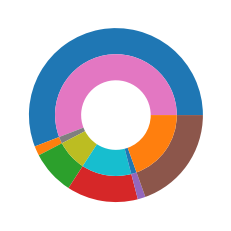

In [53]:
outer_width=0.3
plt.pie(data=sales_country,
       x='Sales',
       radius=1,
       wedgeprops={'width': outer_width});

plt.pie(data=sales_country,
       x='Sales',
       radius=1-outer_width,
       wedgeprops={'width': 0.3});

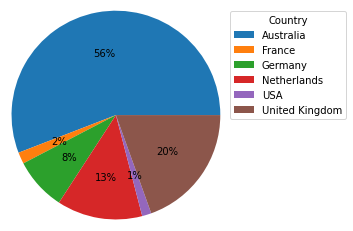

In [55]:
plt.pie(data=sales_country, 
       x='Sales', 
       autopct='%.0f%%', 
       radius=1.2)

plt.legend(labels = sales_country.Country,
          title="Country",
          loc="best",
          bbox_to_anchor=(1, 1, 0, 0)
          );

## 3D Plots

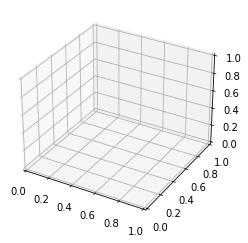

In [56]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

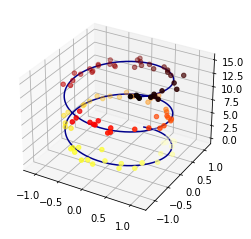

In [58]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'darkblue');

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='hot_r')
plt.show()